In [89]:
import numpy as np
import pandas as pd

n = 1000
ar_params = [0.7, -0.4]
ma_params = [0.5]
d = 1

np.random.seed(42)
epsilon = np.random.normal(0, 1, n)
y = np.zeros(n)

for t in range(2, n):
    y[t] = ar_params[0] * y[t-1] + ar_params[1] * y[t-2] + epsilon[t]

if d > 0:
    y_diff = np.diff(y, n=d)
else:
    y_diff = y

df = pd.DataFrame(y_diff, columns=["Value"])
df['Date'] = pd.date_range(start='2020-01-01', periods=n-1, freq='D')

print(df.head())


      Value       Date
0  0.000000 2020-01-01
1  0.647689 2020-01-02
2  1.328723 2020-01-03
3 -1.086152 2020-01-04
4 -1.291780 2020-01-05


In [90]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df.set_index("Date", inplace=True)
df

,Value
Date,
2020-01-01,0.000000
2020-01-02,0.647689
2020-01-03,1.328723
2020-01-04,-1.086152
2020-01-05,-1.291780
...,...
2022-09-21,0.417389
2022-09-22,2.392222
2022-09-23,0.350756


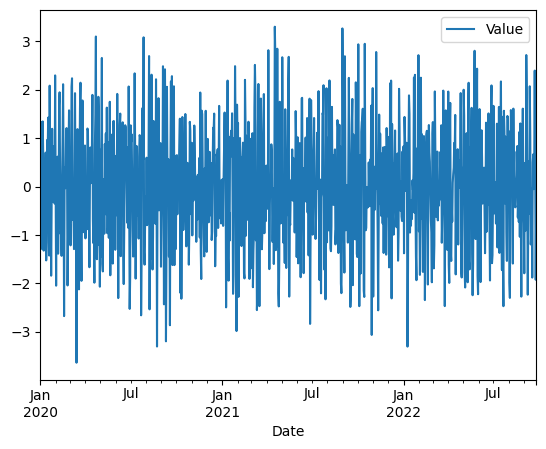

In [91]:
df.plot()
plt.show()

# ACF y PACF

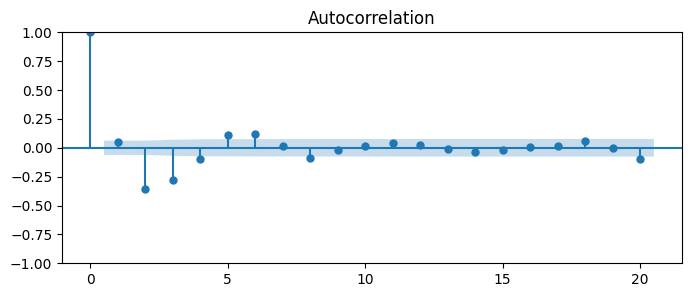

In [92]:
fig, ax = plt.subplots(figsize=(8, 3))
plot_acf(df['Value'], lags=20, ax=ax)
plt.show()

MA(1)?

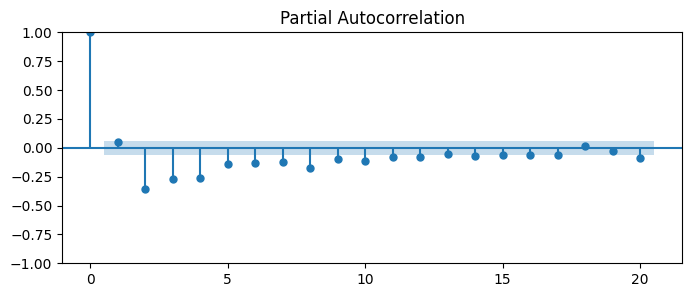

In [93]:
fig, ax = plt.subplots(figsize=(8, 3))
plot_pacf(df['Value'], lags=20, ax=ax)
plt.show()

AR(1)?

# Test estacionariedad

In [94]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['Value'])

(np.float64(-11.707363195348266),
 np.float64(1.5176008282553671e-21),
 20,
 978,
 {'1%': np.float64(-3.437054035425408),
  '5%': np.float64(-2.8644997864059363),
  '10%': np.float64(-2.5683459429326576)},
 np.float64(2798.3266834671954))

# Estacionalidad

No detectada anteriormente

# Variables exogenas

No tenemos mas features en el dataframe. 

# Construccion del Modelo

## Division del dataframe

### Division normal

In [95]:
train_size = int(0.8 * len(df))
train, test = df[:train_size], df[train_size:]

In [96]:
test

,Value
Date,
2022-03-10,0.720867
2022-03-11,-0.698693
2022-03-12,-0.165266
2022-03-13,-0.394605
2022-03-14,-0.182338
...,...
2022-09-21,0.417389
2022-09-22,2.392222
2022-09-23,0.350756


### Validacion cruzada

In [97]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=4, gap=2)
for i, (train_index, test_index) in enumerate(tscv.split(df['Value'])):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200]
  Test:  index=[203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238

## Modelo

In [98]:
import statsmodels.api as sm

In [99]:
mod = sm.tsa.ARIMA(train['Value'], order=(1, 0, 1))  
res = mod.fit()  
print(res.summary())

c:\Users\Usuario de Pruebas\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario de Pruebas\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario de Pruebas\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  799
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1193.450
Date:                Tue, 22 Apr 2025   AIC                           2394.899
Time:                        21:47:57   BIC                           2413.633
Sample:                    01-01-2020   HQIC                          2402.096
                         - 03-09-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.048e-06      0.000      0.003      0.998      -0.001       0.001
ar.L1          0.4968      0.033     15.227      0.000       0.433       0.561
ma.L1         -0.9999      0.292     -3.421      0.0

In [100]:
mod = sm.tsa.ARIMA(train['Value'], order=(2, 0, 2), trend='n')  
res = mod.fit()  
print(res.summary())

c:\Users\Usuario de Pruebas\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario de Pruebas\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario de Pruebas\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  799
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1123.047
Date:                Tue, 22 Apr 2025   AIC                           2256.093
Time:                        21:47:57   BIC                           2279.510
Sample:                    01-01-2020   HQIC                          2265.089
                         - 03-09-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7826      0.075     10.405      0.000       0.635       0.930
ar.L2         -0.4435      0.045     -9.866      0.000      -0.532      -0.355
ma.L1         -1.1050      0.703     -1.571      0.1

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [102]:
# Predicción sobre el rango de test
start = len(train)
end = start + len(test) - 1
forecast = res.predict(start=start, end=end)

# Alinear índices (por si las fechas importan)
forecast.index = test.index

In [103]:
mae = mean_absolute_error(test['Value'], forecast)
rmse = np.sqrt(mean_squared_error(test['Value'], forecast))
mape = np.mean(np.abs((test['Value'] - forecast) / test['Value'])) * 100

print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")

MAE:  0.9891
RMSE: 1.2121
MAPE: 101.08%


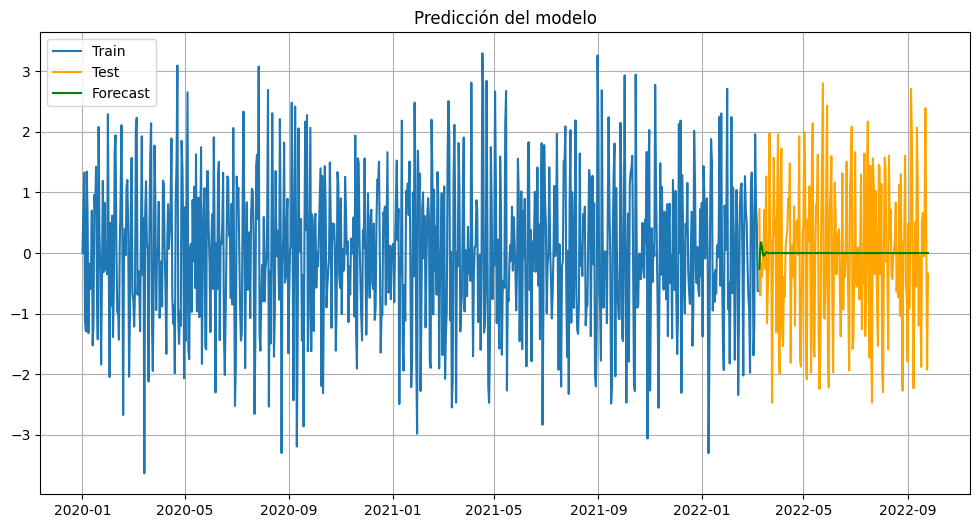

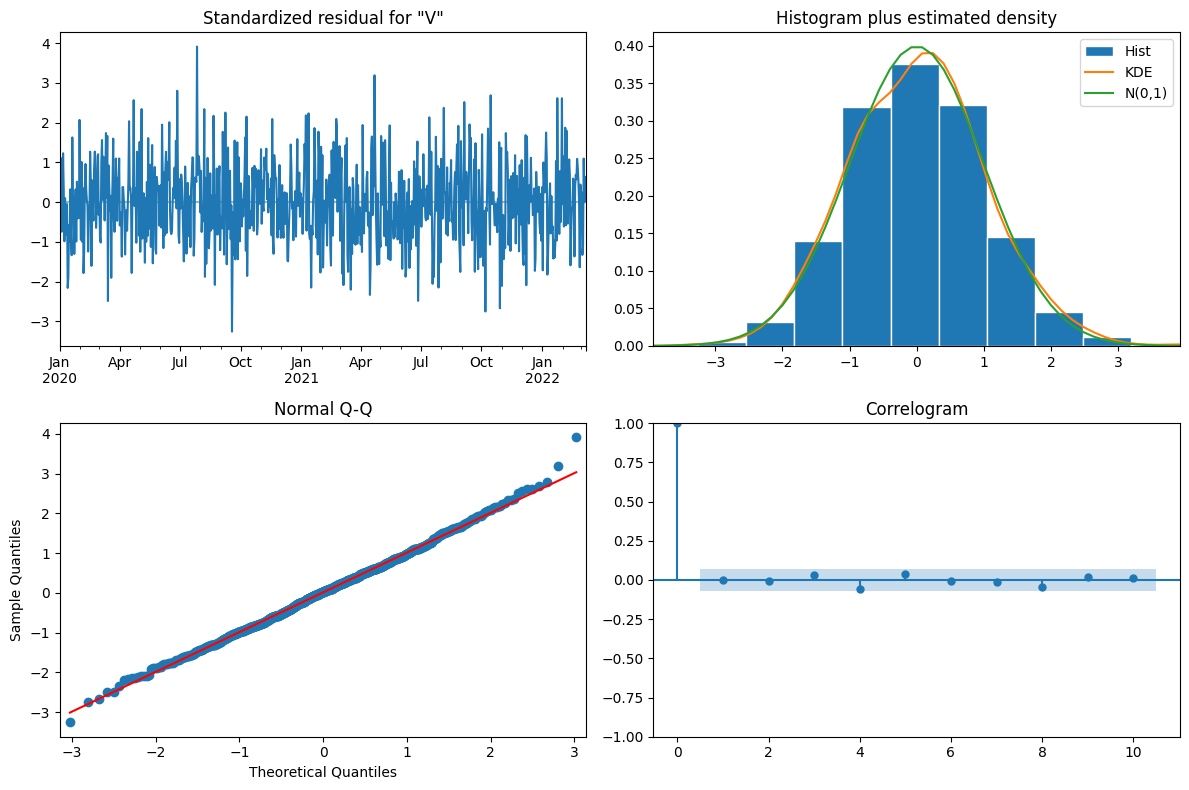

In [104]:
# Gráfico de predicción vs. real
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Value'], label='Train')
plt.plot(test.index, test['Value'], label='Test', color='orange')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.title('Predicción del modelo')
plt.legend()
plt.grid(True)
plt.show()

# Diagnóstico del modelo (residuos, normalidad, etc.)
res.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()
